# SVM for Classification(Scikit-Learn)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df=pd.read_csv('../DATA/mouse_viral_study.csv')

In [3]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


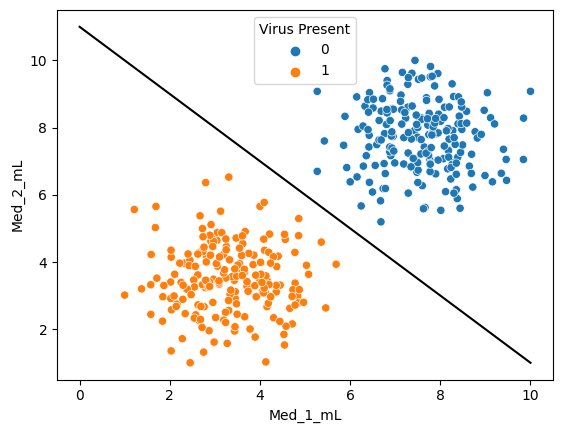

In [4]:
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',hue='Virus Present',data=df)

x=np.linspace(0,10,100)
m=-1
b=11
y=m*x+b

plt.plot(x,y,'black')

In [5]:
from sklearn.svm import SVC

In [6]:
y=df['Virus Present']

In [7]:
X=df.drop('Virus Present',axis=1)

In [8]:
model=SVC(kernel='linear',C=1000)

In [9]:
model.fit(X,y)

SVC(C=1000, kernel='linear')

In [10]:
from svm_margin_plot import plot_svm_boundary

C:\Users\ACER\anaconda3\envs\TensorFlow\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


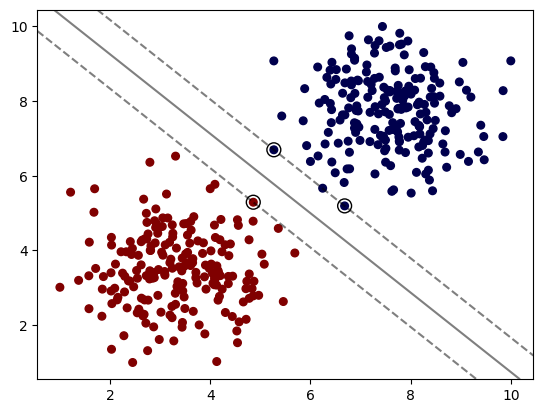

In [11]:
plot_svm_boundary(model,X,y)

In [12]:
model=SVC(kernel='linear',C=0.05)

In [13]:
model.fit(X,y)

SVC(C=0.05, kernel='linear')

C:\Users\ACER\anaconda3\envs\TensorFlow\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


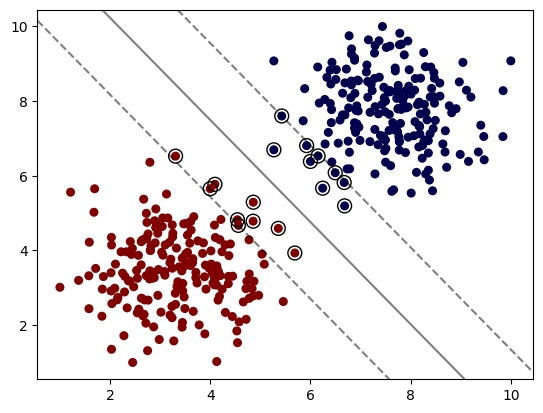

In [14]:
plot_svm_boundary(model,X,y)

C:\Users\ACER\anaconda3\envs\TensorFlow\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


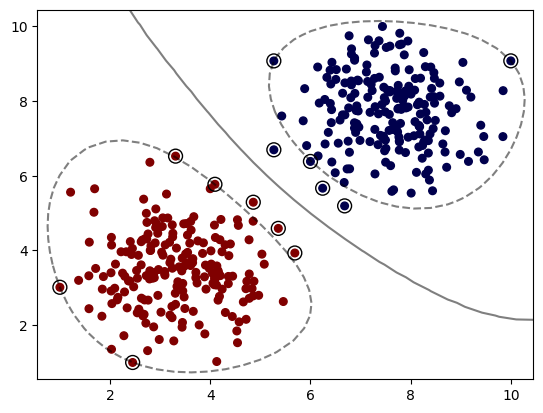

In [15]:
model=SVC(kernel='rbf',C=1,gamma='scale')
model.fit(X,y)
plot_svm_boundary(model,X,y)

C:\Users\ACER\anaconda3\envs\TensorFlow\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


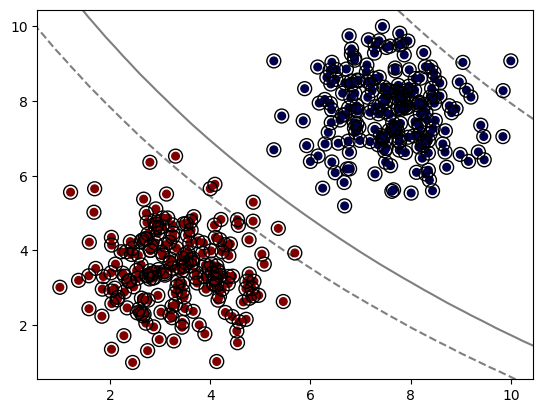

In [16]:
model=SVC(kernel='sigmoid')
model.fit(X,y)
plot_svm_boundary(model,X,y)

C:\Users\ACER\anaconda3\envs\TensorFlow\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


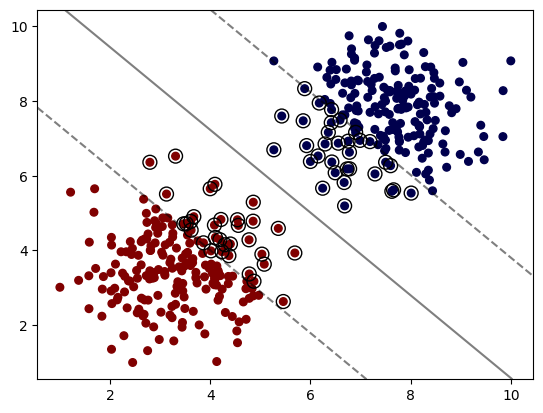

In [17]:
model=SVC(kernel='poly',degree=1,C=0.05)
model.fit(X,y)
plot_svm_boundary(model,X,y)

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
svm=SVC()
param_grid={'C':[0.01,0.1,1.1],'kernel':['linear','rbf']}

In [20]:
grid=GridSearchCV(svm,param_grid)

In [21]:
grid.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1.1], 'kernel': ['linear', 'rbf']})

In [22]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}

# SVM for Regression(Scikit-Learn)

In [23]:
df=pd.read_csv('../DATA/cement_slump.csv')

In [24]:
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


<Axes: >

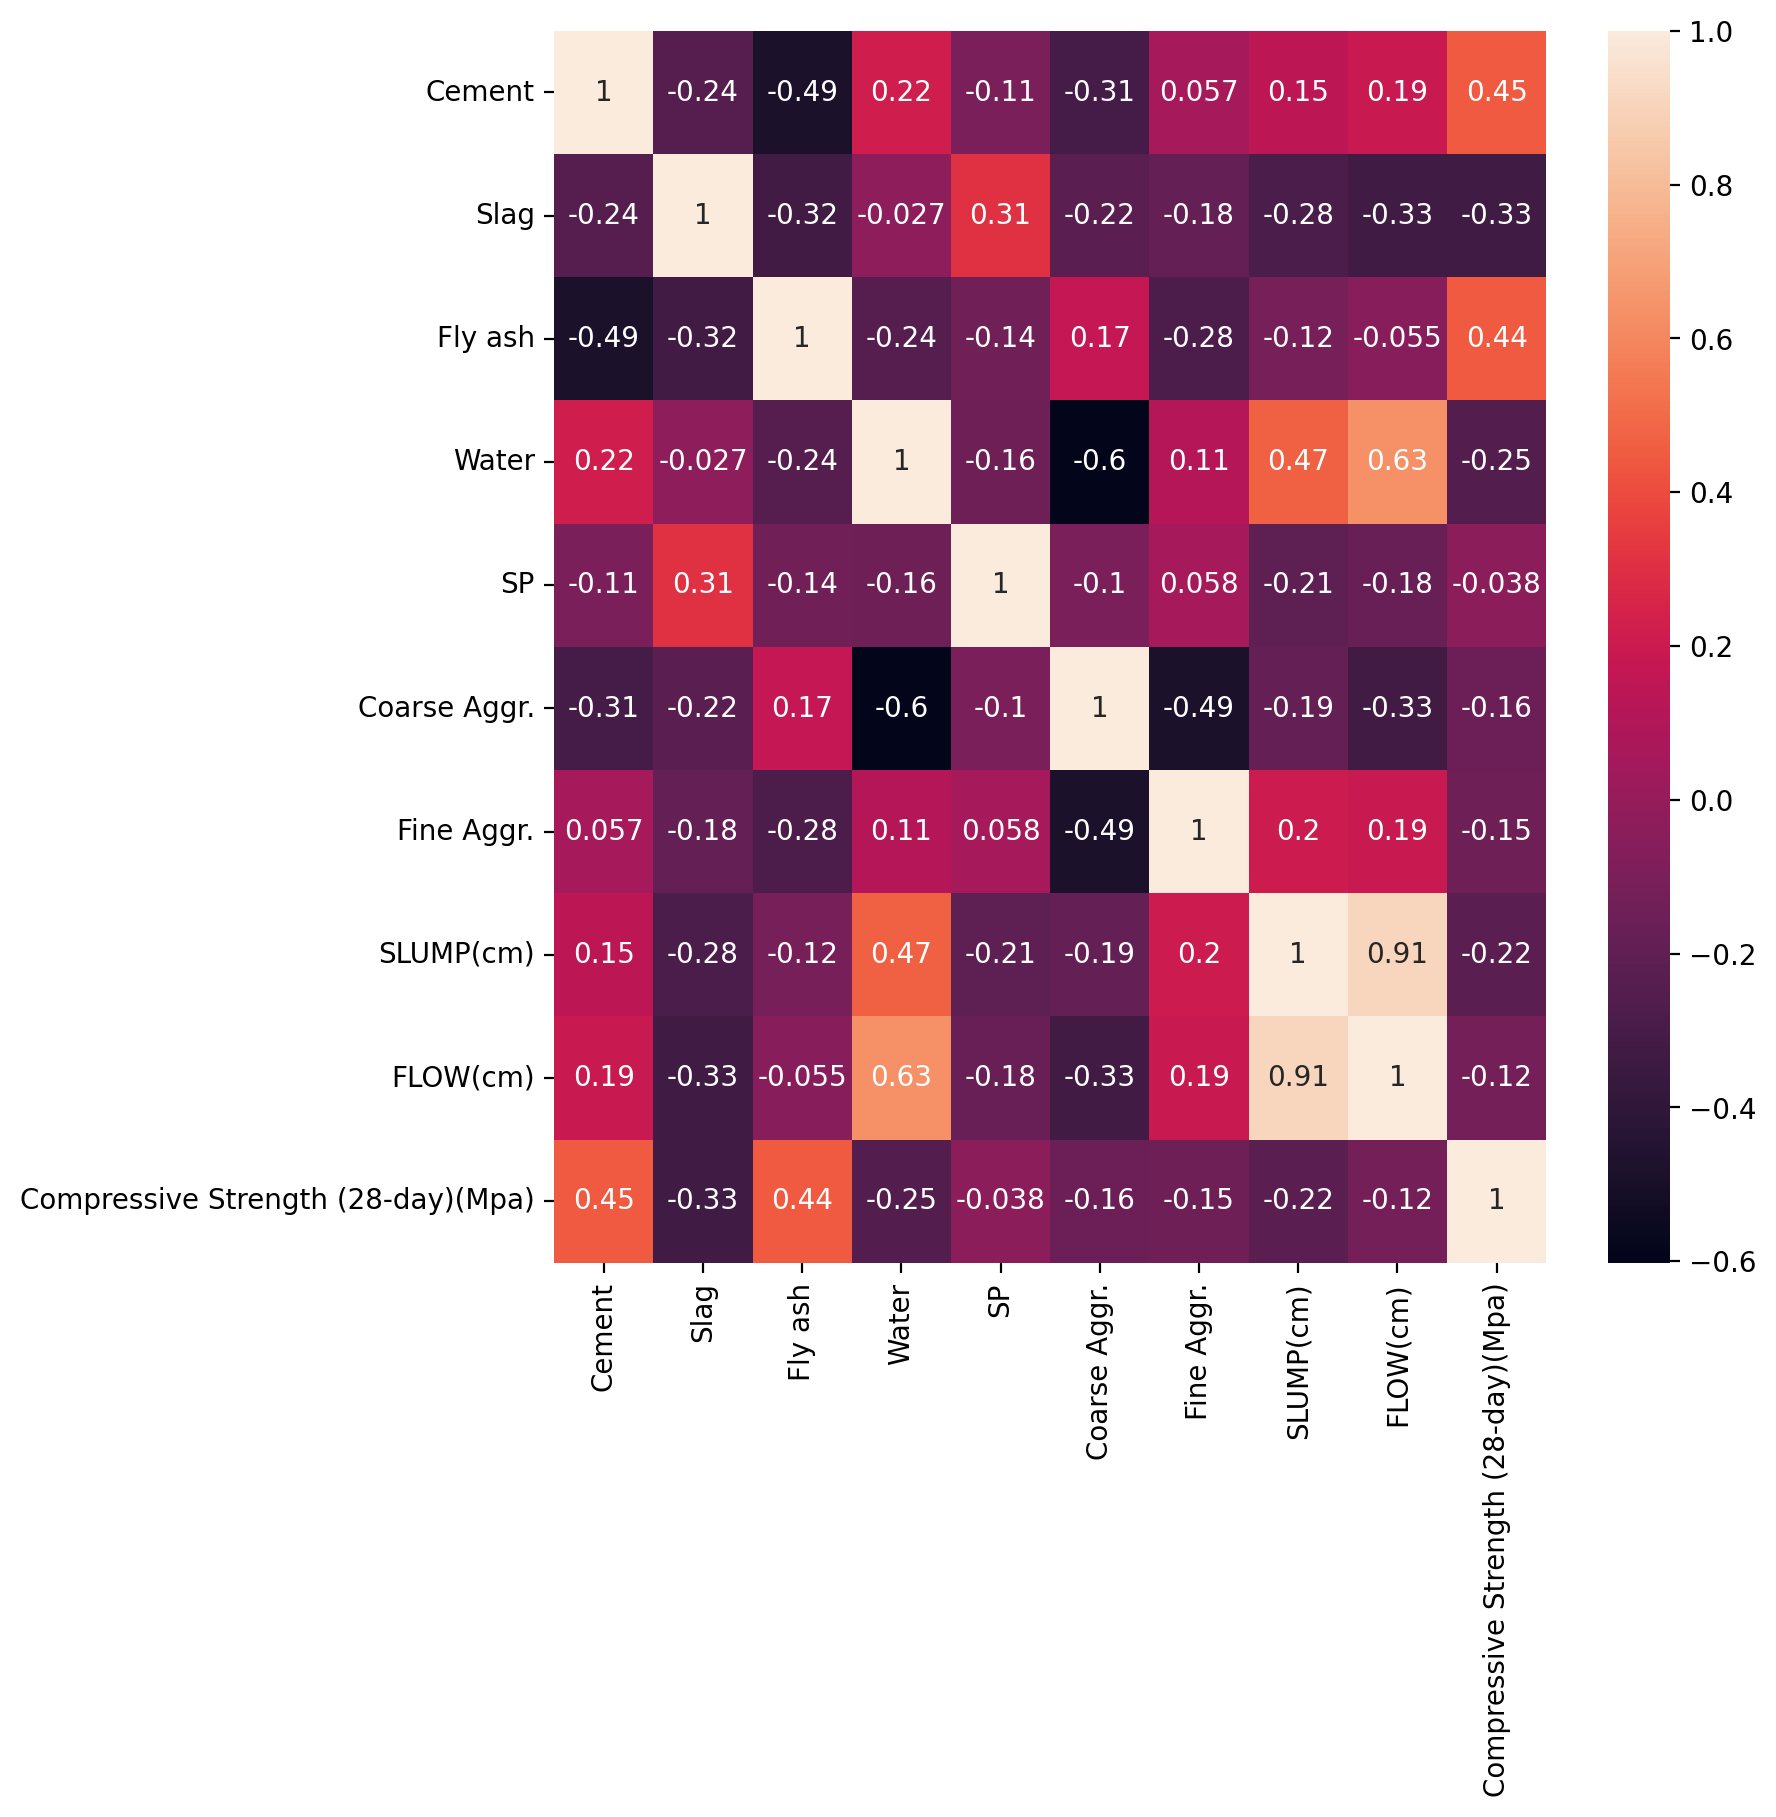

In [25]:
plt.figure(figsize=(8,8),dpi=200)
sns.heatmap(df.corr(),annot=True)

In [26]:
df.columns

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

In [27]:
X=df.drop('Compressive Strength (28-day)(Mpa)',axis=1)

In [28]:
y=df['Compressive Strength (28-day)(Mpa)']

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler=StandardScaler()

In [33]:
scaled_X_train=scaler.fit_transform(X_train)

In [34]:
scaled_X_test=scaler.transform(X_test)

In [35]:
from sklearn.svm import SVR,LinearSVR

In [36]:
base_model=SVR()

In [37]:
base_model.fit(scaled_X_train,y_train)

SVR()

In [38]:
base_preds=base_model.predict(scaled_X_test)

In [39]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [40]:
mean_squared_error(y_test,base_preds)

44.83527552212948

In [41]:
mean_absolute_error(y_test,base_preds)

5.236902091259179

In [42]:
np.sqrt(mean_squared_error(y_test,base_preds))

6.695914838327133

In [43]:
y_test.mean()

36.26870967741935

In [44]:
param_grid={
    'C':[0.001,0.01,0.1,0.5,1],
    'kernel':['linear','rbf','poly'],
    'gamma':['scale','auto'],
    'degree':[2,3,4],
    'epsilon':[0,0.01,0.1,0.5,1,2]
}

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
svr=SVR()

In [47]:
grid=GridSearchCV(svr,param_grid)

In [48]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [50]:
grid.best_params_

{'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [51]:
grid_preds=grid.predict(scaled_X_test)

In [52]:
mean_absolute_error(y_test,grid_preds)

2.512801221076198

In [53]:
np.sqrt(mean_squared_error(y_test,grid_preds))

3.1782103051198347

# Implementation in a Project

Data Source: P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.



In [54]:
#Wine Fraudulent

In [55]:
df=pd.read_csv("../DATA/wine_fraud.csv")

In [56]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [57]:
df['quality'].unique()

array(['Legit', 'Fraud'], dtype=object)

<Axes: xlabel='quality', ylabel='count'>

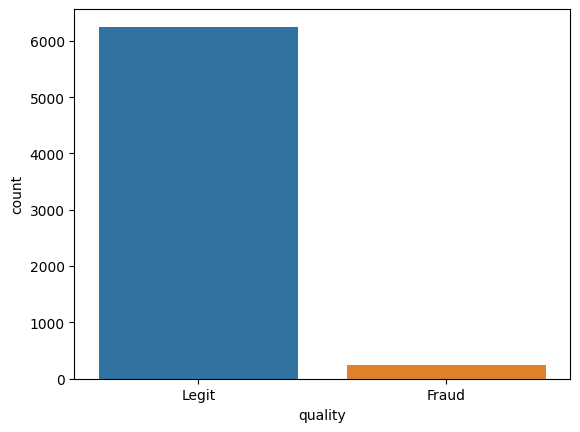

In [58]:
sns.countplot(x='quality',data=df)

In [59]:
df['quality'].value_counts()

Legit    6251
Fraud     246
Name: quality, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

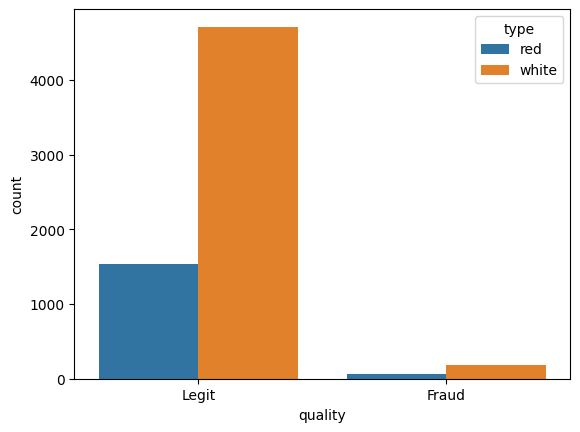

In [61]:
sns.countplot(x='quality',data=df,hue='type')

<Axes: xlabel='type', ylabel='count'>

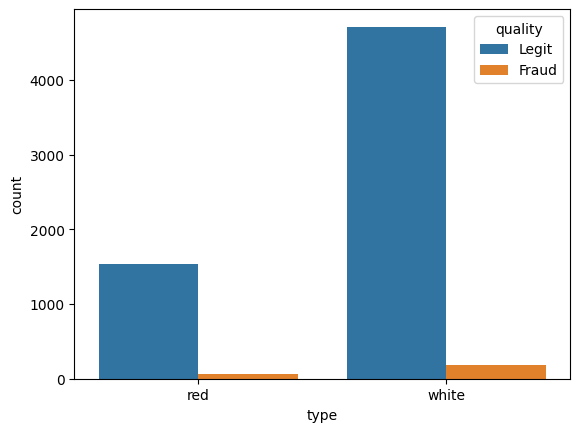

In [62]:
sns.countplot(hue='quality',data=df,x='type')

In [64]:
reds=df[df['type']=='red']
whites=df[df['type']=='white']

In [66]:
#reds

In [67]:
100*len(reds[reds['quality']=='Fraud'])/len(reds)

3.9399624765478425

In [68]:
100*len(whites[whites['quality']=='Fraud'])/len(whites)

3.736218864842793

In [69]:
df['Fraud']=df['quality'].map({'Legit':0,'Fraud':1})

In [70]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,Fraud
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red,0


C:\Users\ACER\AppData\Local\Temp\ipykernel_1376\2808675661.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Fraud'][:-1].sort_values().plot(kind='bar')


<Axes: >

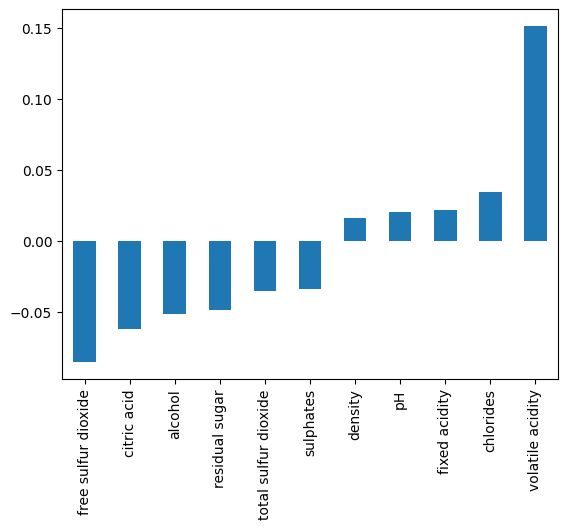

In [73]:
df.corr()['Fraud'][:-1].sort_values().plot(kind='bar')

C:\Users\ACER\AppData\Local\Temp\ipykernel_1376\2264598918.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(df.corr(),cmap='viridis')


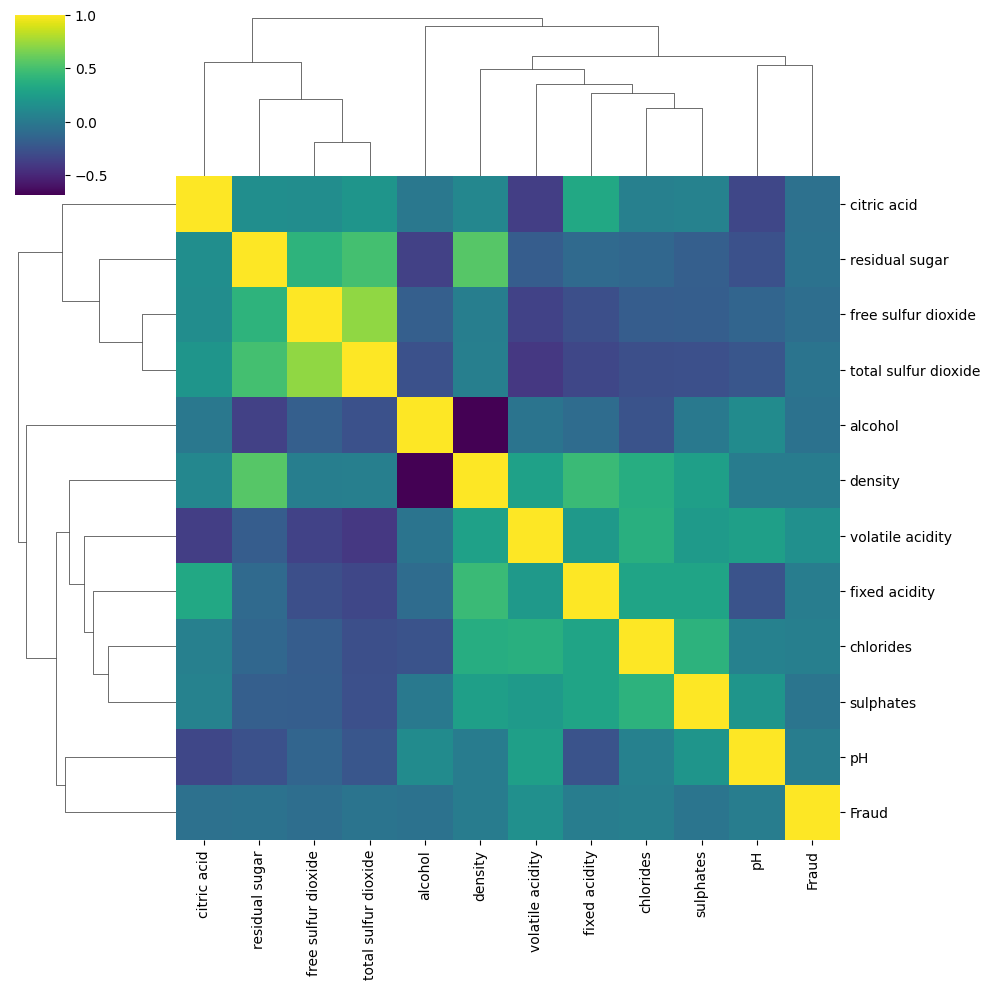

In [74]:
sns.clustermap(df.corr(),cmap='viridis')

In [75]:
# ML Model

In [76]:
df=df.drop('Fraud',axis=1)

In [78]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [79]:
df['type']=pd.get_dummies(df['type'],drop_first=True)

In [80]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,0


In [81]:
X=df.drop('quality',axis=1)

In [82]:
y=df['quality']

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=101)

In [87]:
from sklearn.preprocessing import StandardScaler

In [88]:
scaler=StandardScaler()

In [89]:
scaled_X_train=scaler.fit_transform(X_train)

In [90]:
scaled_X_test=scaler.transform(X_test)

In [91]:
from sklearn.svm import SVC

In [92]:
svc=SVC(class_weight='balanced')

In [93]:
param_grid={
    'C':[0.001,0.01,0.1,0.5,1]
}

In [94]:
grid=GridSearchCV(svc,param_grid)

In [95]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1]})

In [96]:
grid.best_params_

{'C': 1}

In [99]:
from sklearn.metrics import confusion_matrix,classification_report

In [100]:
 grid_preds=grid.predict(scaled_X_test)

In [101]:
confusion_matrix(y_test,grid_preds)

array([[ 17,  10],
       [ 92, 531]], dtype=int64)

In [102]:
print(classification_report(y_test,grid_preds))

              precision    recall  f1-score   support

       Fraud       0.16      0.63      0.25        27
       Legit       0.98      0.85      0.91       623

    accuracy                           0.84       650
   macro avg       0.57      0.74      0.58       650
weighted avg       0.95      0.84      0.88       650

